In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

####'Age', 'Embarked', and 'Cabin' have null values.

Dropping 'Cabin' since 77.10% of its values is missing

In [6]:
df.drop(columns=['Cabin'],inplace = True)

In [7]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [9]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
#Checking for unique elements in each of the columns
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Embarked         3
dtype: int64

In [11]:
df['Survived'].unique()

array([0, 1], dtype=int64)

In [12]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

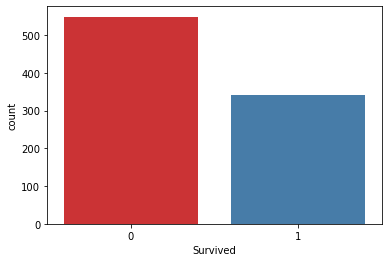

In [13]:
#Checking for Class Imbalance.
sns.countplot(df['Survived'], palette="Set1")

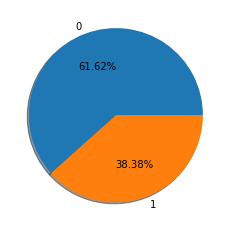

In [14]:
labels= '0','1'
fig, ax = plt.subplots()
ax.pie(df['Survived'].value_counts(),radius =1,labels=labels,autopct = '%1.2f%%', shadow=True,)
plt.show()   

Class
'0' : Has 61.62% of total values

'1' : Has 38.38% of total values

In [15]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

<AxesSubplot:xlabel='Sex', ylabel='count'>

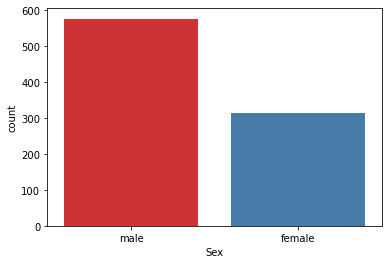

In [16]:
sns.countplot(df['Sex'], palette="Set1")

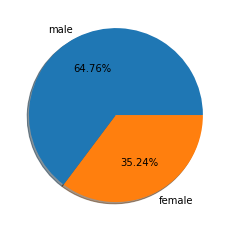

In [17]:
labels= 'male','female'
fig, ax = plt.subplots()
ax.pie(df['Sex'].value_counts(),radius =1,labels=labels,autopct = '%1.2f%%', shadow=True,)
plt.show()   

In [18]:
df['Pclass'].unique()

array([3, 1, 2], dtype=int64)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

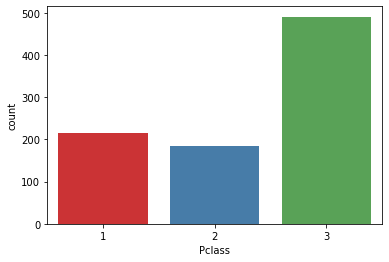

In [19]:
sns.countplot(df['Pclass'], palette="Set1")

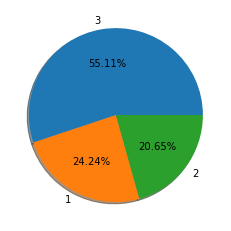

In [20]:
labels= '3','1','2'
fig, ax = plt.subplots()
ax.pie(df['Pclass'].value_counts(),radius =1,labels=labels,autopct = '%1.2f%%', shadow=True,)
plt.show()   

In [21]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [22]:
df['Embarked'].isnull().sum()

2

In [23]:
#locating the index position of null values
df.loc[pd.isna(df['Embarked']),:].index

Int64Index([61, 829], dtype='int64')

In [24]:
df.drop([61,829],inplace=True)

In [25]:
df.reset_index(drop=True,inplace = True)

In [26]:
df.shape

(889, 11)

In [27]:
df['Embarked'].isnull().sum()

0

In [28]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

<AxesSubplot:xlabel='Embarked', ylabel='count'>

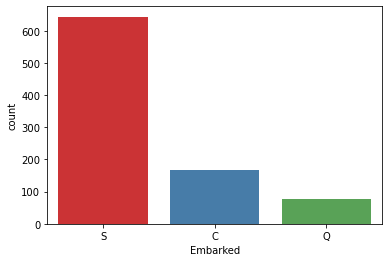

In [29]:
sns.countplot(df['Embarked'], palette="Set1")

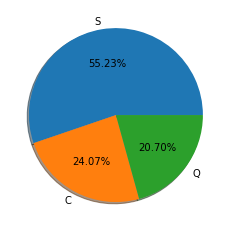

In [30]:
labels= 'S','C','Q'
fig, ax = plt.subplots()
ax.pie(df['Pclass'].value_counts(),radius =1,labels=labels,autopct = '%1.2f%%', shadow=True,)
plt.show()   

55.23% of the passengers embarked from 'S',

24.07% of the passengers embarked from 'C',

20.70% of the passengers embarked from 'Q'

# Encoding the categorical data in 'Sex' and 'Embarked'

In [31]:
df['Sex'] = df.Sex.map({'female':0,'male':1})

In [32]:
dummy = pd.get_dummies(df['Embarked'],drop_first = False)
dummy

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
884,0,0,1
885,0,0,1
886,0,0,1
887,1,0,0


In [33]:
df = df.join(dummy)

In [34]:
df.drop(columns = ['Embarked'],axis = 1, inplace = True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,0,0,1
885,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,0,0,1
886,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,0,0,1
887,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,1,0,0


# Dropping columns 'PassengerId','Name','Ticket' since they are not required for predicting values of target column.

In [35]:
df.drop(columns=['PassengerId','Name','Ticket'] , inplace=True)

In [36]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...,...
884,0,2,1,27.0,0,0,13.0000,0,0,1
885,1,1,0,19.0,0,0,30.0000,0,0,1
886,0,3,0,NaN,1,2,23.4500,0,0,1
887,1,1,1,26.0,0,0,30.0000,1,0,0


Filling NaN values in 'Age' column

<AxesSubplot:xlabel='Age'>

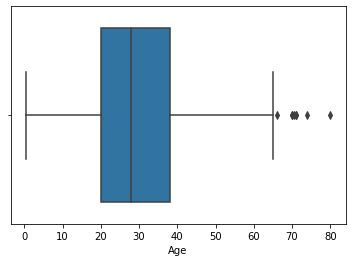

In [37]:
sns.boxplot(df['Age'])

There are outliers present in age


Using KNN Imputation technique for imputing missing data.

In [38]:
from sklearn.impute import KNNImputer

In [39]:
imp = KNNImputer(n_neighbors=2)

In [40]:
TitanDF_filled = df.copy()

In [41]:
TitanDF_filled = imp.fit_transform(TitanDF_filled[['Sex','Age']])

In [42]:
TitanDF_filled

array([[ 1., 22.],
       [ 0., 38.],
       [ 0., 26.],
       ...,
       [ 0., 32.],
       [ 1., 26.],
       [ 1., 32.]])

In [43]:
type(TitanDF_filled)

numpy.ndarray

In [44]:
TitanDF_filled = pd.DataFrame(TitanDF_filled, columns=['Sex','Age']) #to convert numpy array back into dataframe

In [45]:
TitanDF_filled.index = df.index

In [46]:
df[['Age','Sex']] = TitanDF_filled[['Age','Sex']]

In [47]:
df['Age'].isnull().sum()

0

There are no more values missing from 'Age' column.

# Coorelation:

In [48]:
df.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
Survived,1.000000,-0.335549,-0.541585,-0.061387,-0.034040,0.083151,0.255290,0.169966,0.004536,-0.151777
Pclass,-0.335549,1.000000,0.127741,-0.327795,0.081656,0.016824,-0.548193,-0.245733,0.220558,0.076466
Sex,-0.541585,0.127741,1.000000,0.065452,-0.116348,-0.247508,-0.179958,-0.084520,-0.075217,0.121405
Age,-0.061387,-0.327795,0.065452,1.000000,-0.225819,-0.173839,0.091212,0.034131,-0.004313,-0.027190
SibSp,-0.034040,0.081656,-0.116348,-0.225819,1.000000,0.414542,0.160887,-0.060074,-0.026692,0.069438
Parch,0.083151,0.016824,-0.247508,-0.173839,0.414542,1.000000,0.217532,-0.011588,-0.081585,0.061512
Fare,0.255290,-0.548193,-0.179958,0.091212,0.160887,0.217532,1.000000,0.270731,-0.116684,-0.163758
C,0.169966,-0.245733,-0.084520,0.034131,-0.060074,-0.011588,0.270731,1.000000,-0.148646,-0.782613
Q,0.004536,0.220558,-0.075217,-0.004313,-0.026692,-0.081585,-0.116684,-0.148646,1.000000,-0.499261
S,-0.151777,0.076466,0.121405,-0.027190,0.069438,0.061512,-0.163758,-0.782613,-0.499261,1.000000


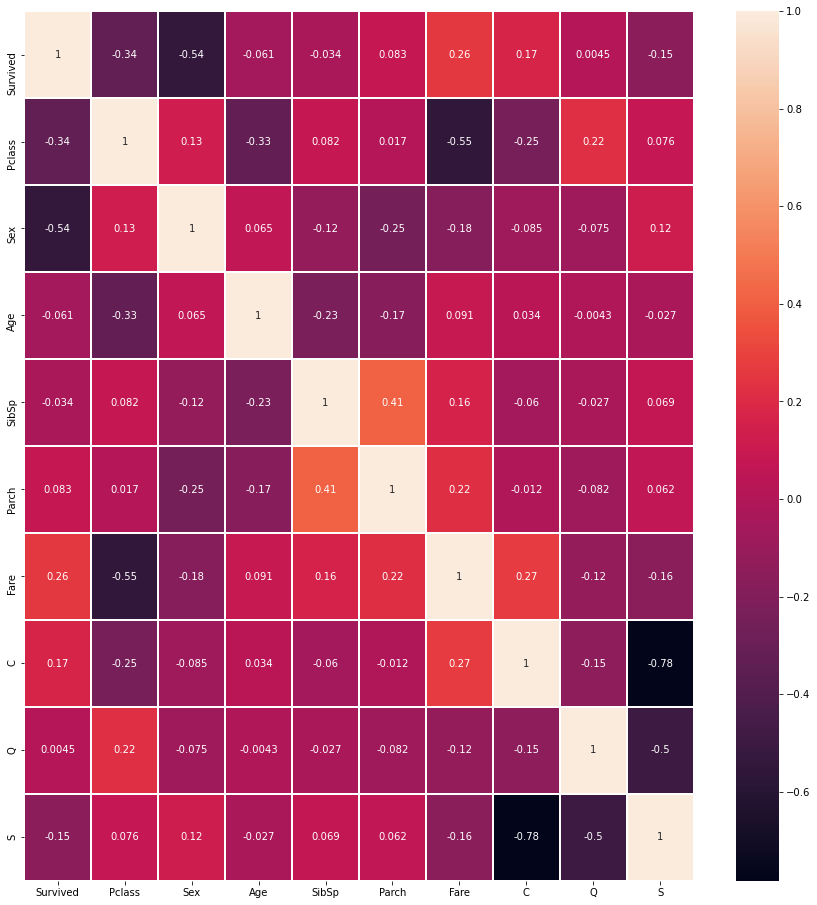

In [49]:
plt.figure(figsize=(15,16))
sns.heatmap(df.corr(),annot=True,linewidth=1)
plt.show()

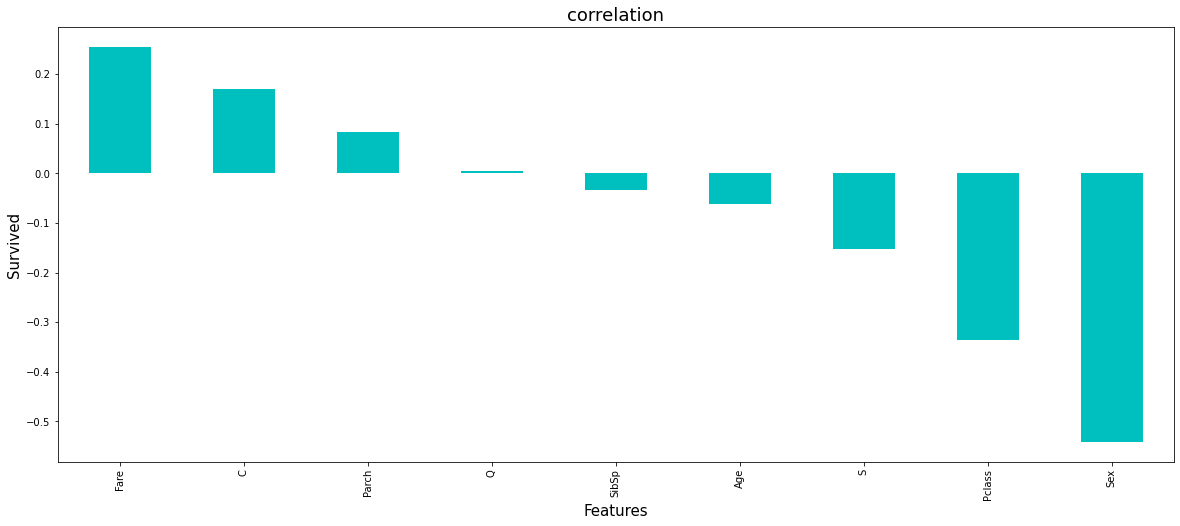

In [50]:
#Visualizing correlation of feature columns with label column.
plt.figure(figsize = (20,8))
df.corr()['Survived'].sort_values(ascending = False).drop(['Survived']).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Survived',fontsize=15)
plt.title('correlation',fontsize = 18)
plt.show()

# Relationship between Dependent Variable and Independent Variables

In [51]:
X = df.drop(columns = ['Survived'])
y = df['Survived']

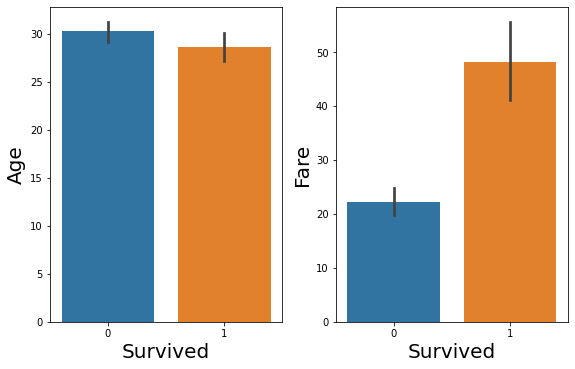

In [52]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
y = df['Survived']
X = df[['Age','Fare']]
for col in X:
    if plotnum<=23:
        plt.subplot(5,5,plotnum)
        sns.barplot(y,X[col])
        plt.xlabel('Survived',fontsize=20)
        plt.ylabel(col,fontsize=20)
    plotnum+=1
plt.tight_layout()

It can be observed that the passengers who paid higher fare amounts were more likely to have survived than those who paid lesser amounts.

It can also observed that, there isn't a very strong correlation between passenger age and survival.

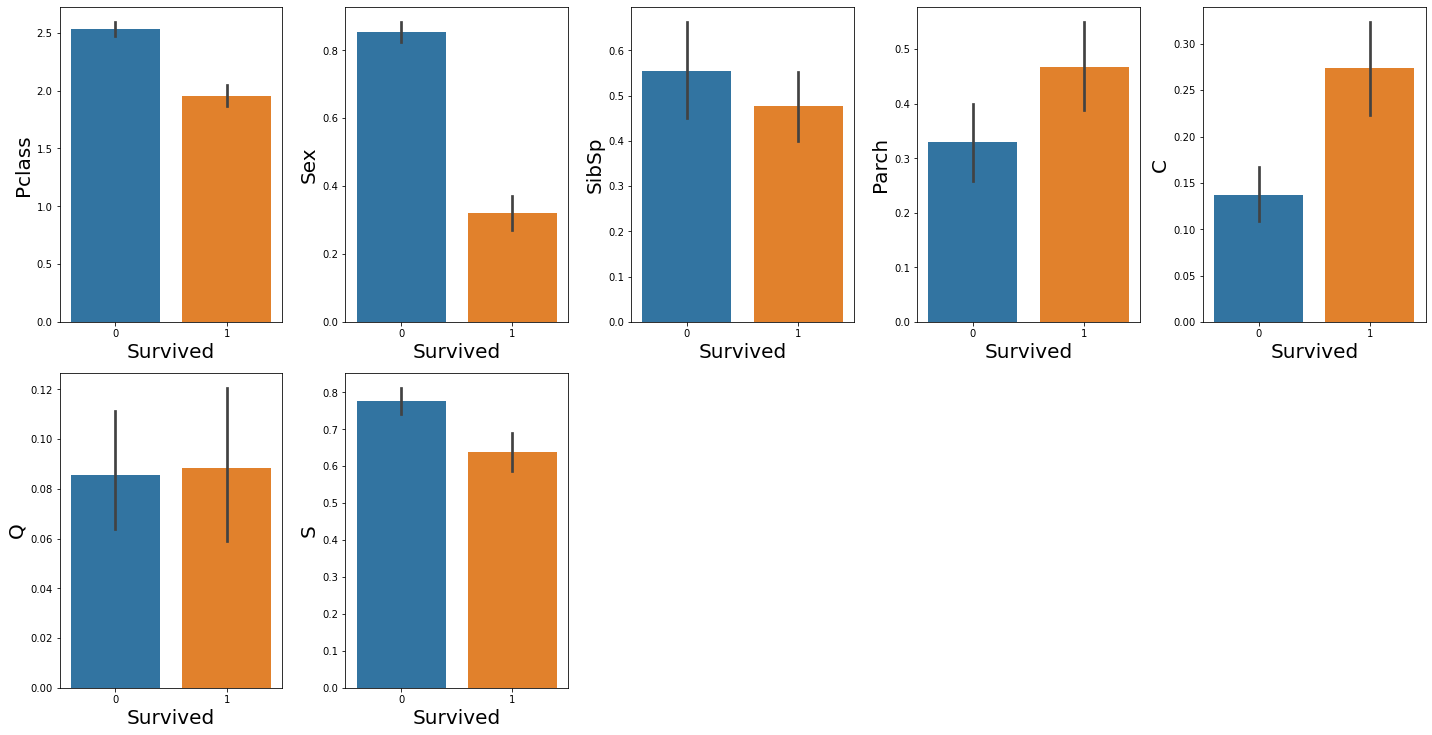

In [53]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
y = df['Survived']
X = df.drop(columns=['Survived','Age','Fare'])
for col in X:
    if plotnum<=23:
        plt.subplot(5,5,plotnum)
        sns.barplot(y,X[col])
        plt.xlabel('Survived',fontsize=20)
        plt.ylabel(col,fontsize=20)
    plotnum+=1
plt.tight_layout()

Combining 'SibSP' and 'Parch' to form 'Family' column to get a better understanding of correlation between survivors and passengers traveling with thier families.

In [54]:
df['Families'] = df['Parch']+df['SibSp']

In [55]:
df['Families']

0      1
1      1
2      0
3      1
4      0
      ..
884    0
885    0
886    3
887    0
888    0
Name: Families, Length: 889, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

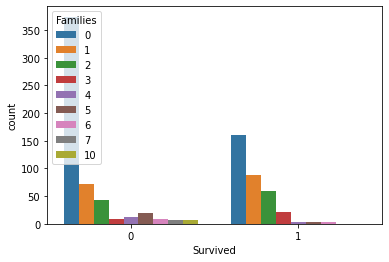

In [56]:
sns.countplot(y, hue =df['Families'])

dropping columns 'SibSp' and 'Parch'

In [57]:
df.drop(columns=['SibSp','Parch'],inplace=True )

<AxesSubplot:xlabel='Survived', ylabel='count'>

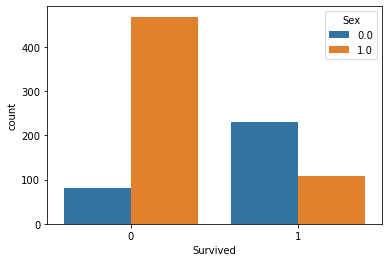

In [58]:
sns.countplot(y, hue =df['Sex'])

Women were more likely to have survived than men

<AxesSubplot:xlabel='Survived', ylabel='Age'>

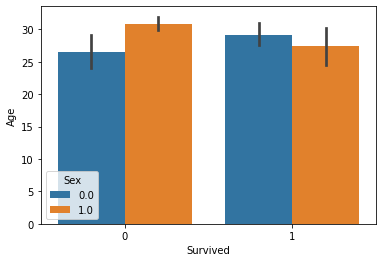

In [59]:
sns.barplot(x = df['Survived'],y = df['Age'], hue = df['Sex'])

In [60]:
df

,Survived,Pclass,Sex,Age,Fare,C,Q,S,Families
0,0,3,1.0,22.0,7.2500,0,0,1,1
1,1,1,0.0,38.0,71.2833,1,0,0,1
2,1,3,0.0,26.0,7.9250,0,0,1,0
3,1,1,0.0,35.0,53.1000,0,0,1,1
4,0,3,1.0,35.0,8.0500,0,0,1,0
...,...,...,...,...,...,...,...,...,...
884,0,2,1.0,27.0,13.0000,0,0,1,0
885,1,1,0.0,19.0,30.0000,0,0,1,0
886,0,3,0.0,32.0,23.4500,0,0,1,3
887,1,1,1.0,26.0,30.0000,1,0,0,0


# Checking for Outliers :

In [62]:
X = df.drop(columns = ['Survived'])
y = df['Survived']

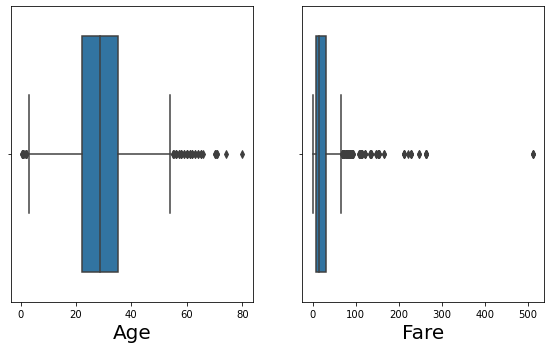

In [63]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
feat= ['Age','Fare']
for col in X[feat]:
    if plotnum<=11:
        plt.subplot(4,4,plotnum)
        sns.boxplot(X[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

# Removing Outliers using Z score Method

In [64]:
df2 = X[feat].copy()

In [65]:
from scipy.stats import zscore
zscor = zscore(df2)
z_score_abs = np.abs(zscor)

df3 = df2[(z_score_abs < 3).all(axis=1)] #taking 3 as threshold value

In [66]:
df3.shape

(862, 2)

In [67]:
df2.shape

(889, 2)

# Calculating percentage of Data loss:

In [68]:
loss=(889-862)/889 * 100
loss

3.0371203599550056

3.03% Data loss is within acceptable range

# Using IQR Method

In [69]:
df =X[feat].copy()

In [70]:
indxdrop = np.array([])
for colm in df:
    q1 = df[colm].quantile(0.25)
    q3 = df[colm].quantile(0.75)
    iqr = q3-q1
    upperval = q3 + (1.5*iqr)
    lowerval = q1 - (1.5*iqr)
    col = df[colm]
    indx = col[(col > upperval) | (col < lowerval)].index
    indxdrop = np.append(indxdrop, indx)
# find all the indices of outliers in the columns using IQR and append them to indxdrop array 

In [71]:
indxdrop 

array([  7.,  11.,  15.,  16.,  33.,  54.,  77.,  93.,  95., 115., 118.,
       151., 163., 169., 171., 173., 182., 194., 204., 231., 251., 267.,
       274., 279., 296., 304., 325., 339., 365., 380., 385., 437., 455.,
       466., 468., 478., 482., 486., 491., 492., 529., 544., 554., 569.,
       586., 624., 625., 629., 641., 643., 646., 658., 671., 683., 693.,
       744., 754., 771., 787., 802., 823., 826., 829., 849., 877.,   1.,
        27.,  31.,  34.,  52.,  61.,  71.,  87., 101., 117., 119., 123.,
       138., 150., 158., 179., 194., 200., 214., 217., 223., 229., 244.,
       255., 256., 257., 261., 267., 268., 274., 289., 290., 296., 298.,
       304., 305., 306., 309., 310., 317., 318., 323., 324., 331., 333.,
       335., 336., 340., 365., 368., 372., 374., 376., 379., 384., 389.,
       392., 411., 434., 437., 444., 452., 483., 485., 495., 497., 503.,
       504., 519., 526., 536., 539., 543., 549., 556., 557., 580., 584.,
       586., 590., 608., 626., 640., 644., 654., 65

In [72]:
df = df.drop(indxdrop)

In [73]:
df.shape

(721, 2)

In [74]:
loss=(889-721)/889 * 100
loss

18.89763779527559

18.89% data loss is outside acceptable range.

Using Z score method to reduce outliers

In [75]:
dropindx = X.index.difference(df3.index)

In [76]:
dropindx

Int64Index([ 27,  87,  95, 115, 117, 257, 298, 310, 340, 376, 379, 437, 492,
            526, 556, 629, 671, 678, 688, 699, 715, 729, 736, 741, 744, 778,
            849],
           dtype='int64')

In [79]:
X.isnull().sum()

Pclass      0
Sex         0
Age         0
Fare        0
C           0
Q           0
S           0
Families    0
dtype: int64

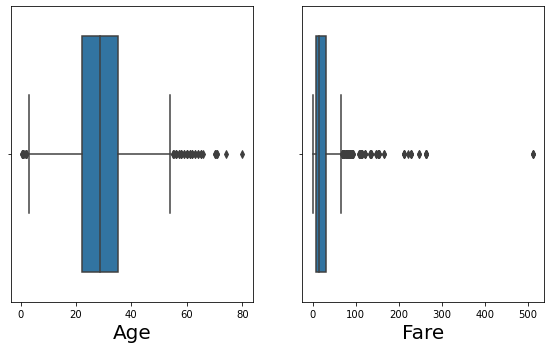

In [80]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
feat= ['Age','Fare']
for col in X[feat]:
    if plotnum<=11:
        plt.subplot(4,4,plotnum)
        sns.boxplot(X[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

In [81]:
X[feat].skew()

Age     0.436971
Fare    4.801440
dtype: float64

In [82]:
(X[feat]==0).sum()

Age      0
Fare    15
dtype: int64

In [83]:
imp = KNNImputer(n_neighbors=2)

In [84]:
X_filled = X.copy()

In [85]:
X_filled = imp.fit_transform(X_filled[['Pclass','Fare']])
X_filled

array([[ 3.    ,  7.25  ],
       [ 1.    , 71.2833],
       [ 3.    ,  7.925 ],
       ...,
       [ 3.    , 23.45  ],
       [ 1.    , 30.    ],
       [ 3.    ,  7.75  ]])

In [86]:
type(X_filled)

numpy.ndarray

In [87]:
X_filled = pd.DataFrame(X_filled, columns=['Pclass','Fare']) #to convert numpy array back into dataframe
X_filled.index = X.index

In [88]:
X[['Pclass','Fare']] = X_filled[['Pclass','Fare']]
X['Fare'].isnull().sum()

0

There are no more values missing from 'Fare' column.

In [89]:
X.skew()

Pclass     -0.636998
Sex        -0.625625
Age         0.436971
Fare        4.801440
C           1.591610
Q           2.944406
S          -1.006192
Families    2.723892
dtype: float64

# Reducing skewness further using PowerTransformer

In [90]:
from sklearn.preprocessing import PowerTransformer

In [91]:
pt = PowerTransformer(method='yeo-johnson', standardize=True)

In [92]:
df4 = X[['Fare','Families']]

In [93]:
transformed = pt.fit_transform(df4)

In [94]:
transformed = pd.DataFrame(transformed, columns=df4.columns)

In [95]:
transformed.skew()

Fare       -0.041424
Families    0.536537
dtype: float64

In [96]:
transformed.index = X.index

In [97]:
X[['Fare','Families']] = transformed[['Fare','Families']]

In [98]:
X.skew()

Pclass     -0.636998
Sex        -0.625625
Age         0.436971
Fare       -0.041424
C           1.591610
Q           2.944406
S          -1.006192
Families    0.536537
dtype: float64

In [99]:
X.isnull().sum()

Pclass      0
Sex         0
Age         0
Fare        0
C           0
Q           0
S           0
Families    0
dtype: int64

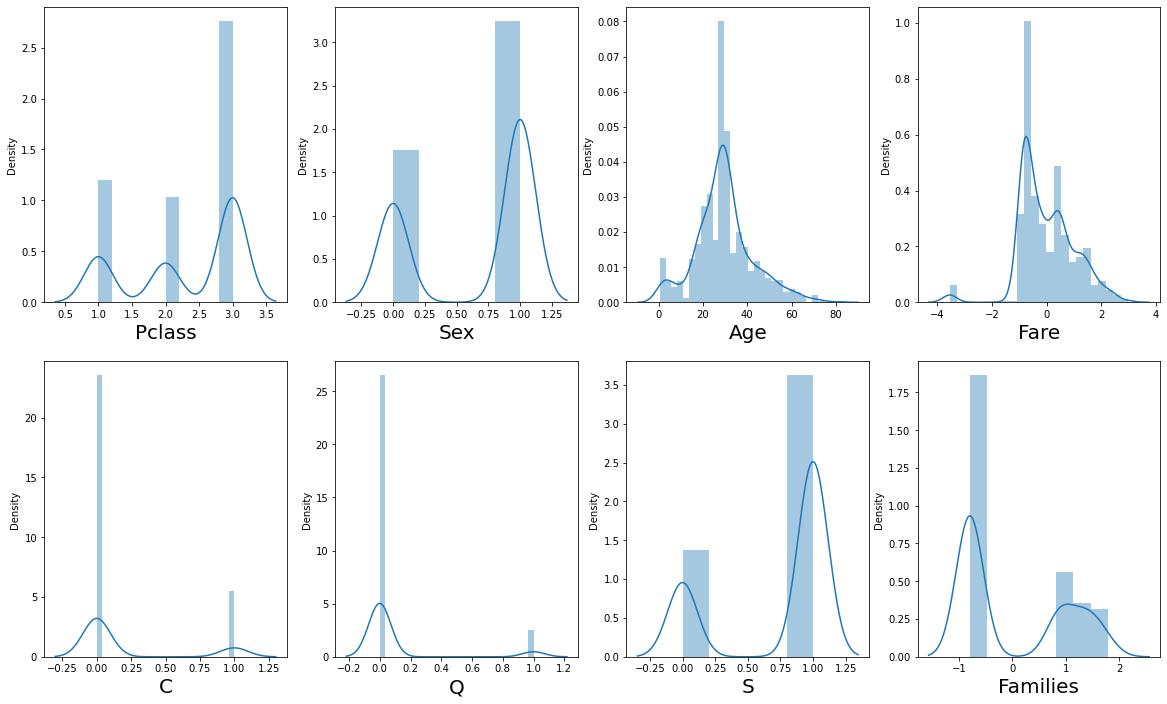

In [100]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
for col in X:
    if plotnum<=10:
        plt.subplot(4,4,plotnum)
        sns.distplot(X[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

In [101]:
from sklearn.preprocessing import StandardScaler

In [102]:
ss = StandardScaler()

In [103]:
scaled_X = ss.fit_transform(df4)

In [104]:
scaled_X

array([[-0.50023975,  0.05785331],
       [ 0.78894661,  0.05785331],
       [-0.48664993, -0.5618044 ],
       ...,
       [-0.17408416,  1.29716872],
       [-0.0422126 , -0.5618044 ],
       [-0.49017322, -0.5618044 ]])

# Selecting Kbest Features

In [105]:
from sklearn.feature_selection import SelectKBest, f_classif

In [106]:
bestfeat = SelectKBest(score_func = f_classif, k = 8)
fit = bestfeat.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [107]:
fit = bestfeat.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
dfcolumns.head()
featureScores = pd.concat([dfcolumns,dfscores],axis = 1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(11,'Score'))

    Feature       Score
1       Sex  368.154732
0    Pclass  112.541402
3      Fare  104.117790
7  Families   29.427378
4         C   26.386296
6         S   20.914977
2       Age    3.355170
5         Q    0.018248


# Retaining all features.

In [108]:
scaler= StandardScaler()
scaled_X = scaler.fit_transform(X)

In [109]:
scaled_X

array([[ 0.82520863,  0.73534203, -0.5872787 , ..., -0.30794088,
         0.61679395,  0.89031101],
       [-1.57221121, -1.35991138,  0.64530839, ..., -0.30794088,
        -1.62128697,  0.89031101],
       [ 0.82520863, -1.35991138, -0.27913193, ..., -0.30794088,
         0.61679395, -0.79750121],
       ...,
       [ 0.82520863, -1.35991138,  0.18308823, ..., -0.30794088,
         0.61679395,  1.5106321 ],
       [-1.57221121,  0.73534203, -0.27913193, ..., -0.30794088,
        -1.62128697, -0.79750121],
       [ 0.82520863,  0.73534203,  0.18308823, ...,  3.24737656,
        -1.62128697, -0.79750121]])

In [128]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve

In [129]:
from sklearn.ensemble import RandomForestClassifier
maxAcc = 0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(scaled_X,y,test_size = .31, random_state = i,stratify = y)
    modRF =  RandomForestClassifier()
    modRF.fit(x_train,y_train)
    pred = modRF.predict(x_test)
    acc  = accuracy_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print(f"Best Accuracy is: {maxAcc} on random_state: {maxRS}")

Best Accuracy is: 0.8478260869565217 on random_state: 18


In [130]:
x_train,x_test,y_train,y_test = train_test_split(scaled_X,y,test_size = .31,random_state = 18) #since class imbalance exists

# LogisticRegression:

In [131]:
from sklearn.linear_model import LogisticRegression

In [132]:
lr= LogisticRegression()

In [133]:
lr.fit(x_train,y_train)

LogisticRegression()

In [135]:
lrpred = lr.predict(x_test)
accu = classification_report(y_test,lrpred)

In [136]:
conf_matrx = confusion_matrix(y_test,lrpred)
conf_matrx

array([[138,  35],
       [ 29,  74]], dtype=int64)

In [137]:
print(accu)

              precision    recall  f1-score   support

           0       0.83      0.80      0.81       173
           1       0.68      0.72      0.70       103

    accuracy                           0.77       276
   macro avg       0.75      0.76      0.75       276
weighted avg       0.77      0.77      0.77       276



# from sklearn.tree import DecisionTreeClassifier:

In [139]:
from sklearn.tree import DecisionTreeClassifier

In [140]:
DTC = DecisionTreeClassifier()

In [141]:
DTC.fit(x_train,y_train)

DecisionTreeClassifier()

In [142]:
DTCpred = DTC.predict(x_test)
accu = classification_report(y_test,DTCpred)

In [143]:
conf_matrx = confusion_matrix(y_test,DTCpred)

In [144]:
print(accu)

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       173
           1       0.74      0.71      0.72       103

    accuracy                           0.80       276
   macro avg       0.78      0.78      0.78       276
weighted avg       0.80      0.80      0.80       276



# SVC:

In [146]:
from sklearn.svm import SVC

In [147]:
SV =  SVC()

In [148]:
SV.fit(x_train,y_train)

SVC()

In [149]:
SVpred = SV.predict(x_test)
accu = classification_report(y_test,SVpred)

In [150]:
conf_matrx = confusion_matrix(y_test,SVpred)
conf_matrx

array([[159,  14],
       [ 33,  70]], dtype=int64)

In [151]:
print(accu)

              precision    recall  f1-score   support

           0       0.83      0.92      0.87       173
           1       0.83      0.68      0.75       103

    accuracy                           0.83       276
   macro avg       0.83      0.80      0.81       276
weighted avg       0.83      0.83      0.83       276



# RandomForestClassifier:-

In [159]:
RFC = RandomForestClassifier()

In [160]:
RFC.fit(x_train,y_train)

RandomForestClassifier()

In [161]:
RFCpred = RFC.predict(x_test)
accu = classification_report(y_test,RFCpred)

In [162]:
conf_matrx = confusion_matrix(y_test,RFCpred)
conf_matrx

array([[146,  27],
       [ 25,  78]], dtype=int64)

In [163]:
print(accu)

              precision    recall  f1-score   support

           0       0.85      0.84      0.85       173
           1       0.74      0.76      0.75       103

    accuracy                           0.81       276
   macro avg       0.80      0.80      0.80       276
weighted avg       0.81      0.81      0.81       276



# Model Cross Validation:

In [164]:
from sklearn.model_selection import cross_val_score as cvs

# Decision Tree Classifier:-

In [165]:
print(cvs(DTC,scaled_X,y,cv=5).mean())

0.770545292960071


# Logistic Regression:-

In [166]:
print(cvs(lr,scaled_X,y,cv=5).mean()) 

0.7874373135275821


# SV Classifier:-

In [167]:
print(cvs(SV,scaled_X,y,cv=5).mean())

0.813305402145623


# RandomForestClassifier:

In [168]:
print(cvs(RFC,scaled_X,y,cv=5).mean())

0.7986732685837618


# Based on comparing Accuracy Score results with Cross Validation results, it is determined that SV Classifier is the best model.

ROC AUC curves

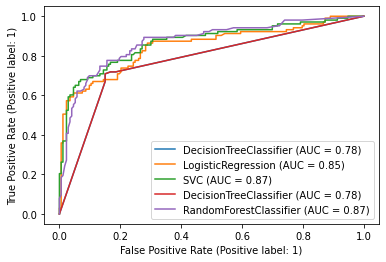

In [169]:
disp = plot_roc_curve(DTC,x_test,y_test)
mod = [lr,SV,DTC,RFC]
for i in mod:
    plot_roc_curve(i,x_test,y_test, ax=disp.ax_)
plt.legend(prop={'size':10}, loc = 'lower right')
plt.show()

# Based on the above graph and roc_auc_scores, RandonForestClassifier is the best model for the dataset, with AUC = 0.87 

# Hyper Parameter Tuning:

In [170]:
from sklearn.model_selection import GridSearchCV

In [172]:
parameter = {'n_estimators':[30,50,60],'max_depth': [10,20,40,60,80],'min_samples_leaf':[5,10,15,20,30],'min_samples_split':[2,5,10,20],'criterion':['gini','entropy'],'max_features':["auto","sqrt","log2"]}

In [173]:
GridCV = GridSearchCV(RandomForestClassifier(),parameter,cv=5,n_jobs = -1)

In [174]:
GridCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 40, 60, 80],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [5, 10, 15, 20, 30],
                         'min_samples_split': [2, 5, 10, 20],
                         'n_estimators': [30, 50, 60]})

In [175]:
GridCV.best_params_

{'criterion': 'gini',
 'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 5,
 'min_samples_split': 20,
 'n_estimators': 60}

In [176]:
Best_mod1 = RandomForestClassifier(n_estimators = 50,criterion = 'entropy', max_depth= 20, max_features = 'log2',min_samples_leaf = 5, min_samples_split = 10)
Best_mod1.fit(x_train,y_train)
rfpred = Best_mod1.predict(x_test)
acc = accuracy_score(y_test,rfpred)
print(acc*100)

82.97101449275362


# Random Forest Classifier has an accuracy of 82.97%

# Saving The Model:

In [177]:
import joblib
joblib.dump(Best_mod1,"ADSTitanic.pkl")

['ADSTitanic.pkl']

Loading The Model

In [179]:
mod=joblib.load("ADSTitanic.pkl")
print(mod.predict(x_test))

[1 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 1 1 0 1 0 0 1 0
 1 0 0 0 0 0 1 1 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 0 1 0 0 1 1 1 1 0 0 1 1 0 1 1 0 0 0 1 0
 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 1 1 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1
 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0
 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 1 1
 1 1 0 1 1 1 0 0 0 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 1]
